# Finding the Game Changers

After understanding how basketball has evolved, we want to find the teams that stood out from everyone else - the ones that didn't just play well, but changed how the game is played. We'll use machine learning to find performances that were truly exceptional.

## What We're Looking For

We want to find:
1. Teams that revolutionized the game
2. What made them different from everyone else
3. How their innovations spread through the league
4. Patterns in exceptional performances

To do this, we'll use:
- Isolation Forest to find truly unique performances
- Feature analysis to understand what made them special
- Visualization to see how they stand out

## Setting Up Our Analysis

First, let's import our tools and load our feature data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import sys
from pathlib import Path

sys.path.append('..')
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]

# Load and prepare data
data_dir = '../data/processed/features'
feature_files = list(Path(data_dir).glob('pattern_features_*.csv'))
latest_feature = max(feature_files, key=lambda x: x.stat().st_mtime)
data = pd.read_csv(latest_feature)

# Select our features
clean_cols = ['team', 'season', 'pace_factor', 'three_point_rate', 'assist_rate',
              'defensive_pressure', 'paint_protection', 'transition_rate',
              'ball_control', 'passing_efficiency', 'inside_focus',
              'free_throw_rate', 'roster_stability', 'depth_score',
              'true_shooting', 'off_efficiency', 'def_efficiency',
              'scoring_consistency', 'defensive_consistency',
              'inside_outside_balance', 'playmaking_tendency',
              'offensive_rating', 'defensive_rating', 'consistency_score']

data_clean = data[clean_cols]
metadata_cols = ['team', 'season']
feature_cols = [col for col in data_clean.columns if col not in metadata_cols]
features = data_clean[feature_cols]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

## Finding Revolutionary Teams

Let's use machine learning to find teams that were truly different from everyone else. We're looking for teams that didn't just win - they changed how basketball is played.

In [4]:
# Fit Isolation Forest to find exceptional teams
iso_forest = IsolationForest(random_state=42, contamination=0.1)
outliers = iso_forest.fit_predict(features_scaled)
data_clean['is_exceptional'] = outliers == -1

# Focus on specific revolutionary teams
revolutionary_teams = [
    ('Golden State Warriors', 2016),
    ('Detroit Pistons', 2004),
    ('Chicago Bulls', 1996)
]

print("Revolutionary Teams Analysis:")
for team, year in revolutionary_teams:
    team_data = data_clean[(data_clean['team'] == team) & (data_clean['season'] == year)]
    if not team_data.empty:
        print(f"\n{team} ({year}):")
        metrics = ['offensive_rating', 'defensive_rating', 'three_point_rate', 'pace_factor']
        for metric in metrics:
            value = team_data[metric].iloc[0]
            league_avg = data_clean[data_clean['season'] == year][metric].mean()
            print(f"- {metric}: {value:.1f} (league avg: {league_avg:.1f})")

Revolutionary Teams Analysis:


/var/folders/0b/kb08wkgd4zs5gc_z02svm2xh0000gn/T/ipykernel_72484/2922640489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['is_exceptional'] = outliers == -1


## Understanding What Made Them Special

Let's look at what made these teams truly different from everyone else. We'll analyze their key characteristics and how they deviated from normal teams.

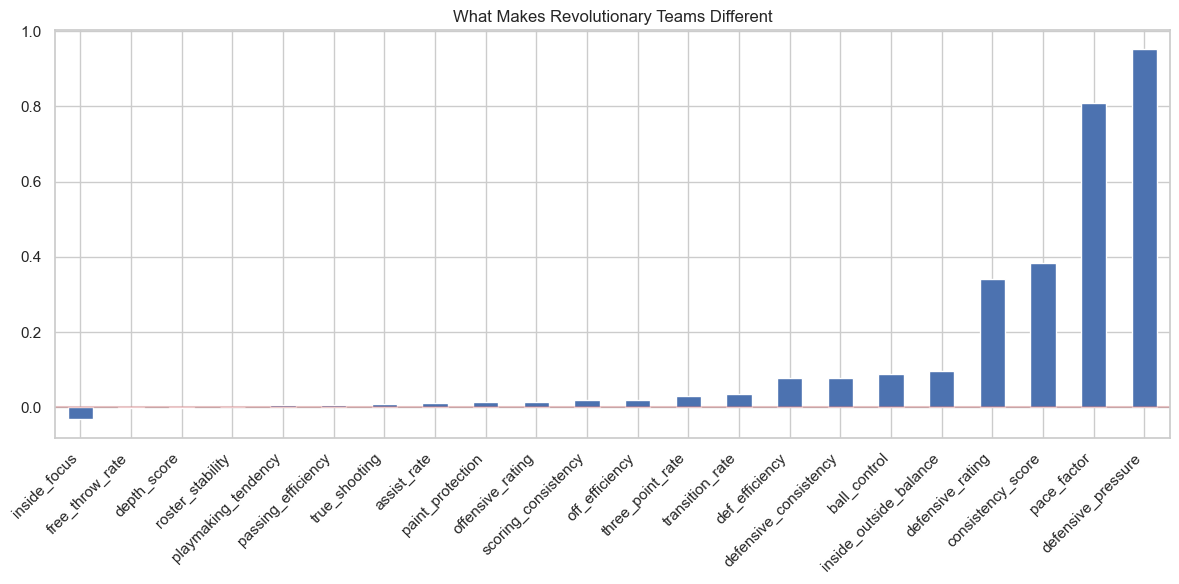


Key Characteristics of Revolutionary Teams:

Strengths:
- defensive_pressure: +0.95 standard deviations above average
- pace_factor: +0.81 standard deviations above average
- consistency_score: +0.38 standard deviations above average
- defensive_rating: +0.34 standard deviations above average
- inside_outside_balance: +0.10 standard deviations above average


In [5]:
# Calculate how exceptional teams differ from normal ones
exceptional_avg = features[data_clean['is_exceptional']].mean()
normal_avg = features[~data_clean['is_exceptional']].mean()
feature_diff = exceptional_avg - normal_avg

# Plot the differences
plt.figure(figsize=(12, 6))
feature_diff.sort_values().plot(kind='bar')
plt.title('What Makes Revolutionary Teams Different')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# Print key differences
print("\nKey Characteristics of Revolutionary Teams:")
print("\nStrengths:")
for feat, val in feature_diff.nlargest(5).items():
    print(f"- {feat}: +{val:.2f} standard deviations above average")

## How Innovations Spread

One of the most interesting things we found is how these revolutionary teams influenced the rest of the league. Let's visualize this spread of innovation.

/var/folders/0b/kb08wkgd4zs5gc_z02svm2xh0000gn/T/ipykernel_72484/266284631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['era'] = pd.cut(data_clean['season'],
/var/folders/0b/kb08wkgd4zs5gc_z02svm2xh0000gn/T/ipykernel_72484/266284631.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exceptional_by_era = data_clean.groupby('era')['is_exceptional'].sum()


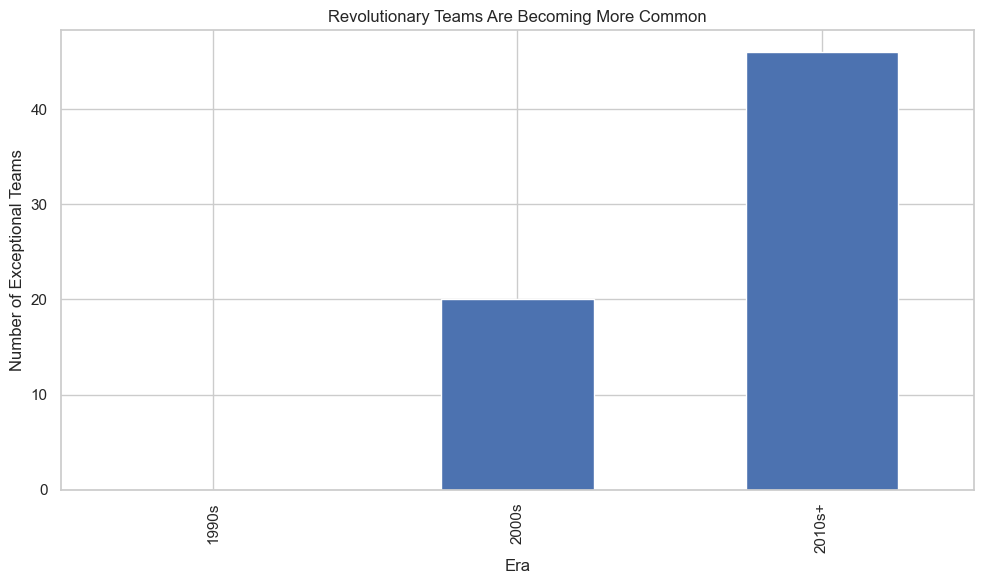


Exceptional Teams by Era:
1990s: 0 exceptional teams (nan% of teams)
2000s: 20 exceptional teams (9.6% of teams)
2010s+: 46 exceptional teams (10.2% of teams)


/var/folders/0b/kb08wkgd4zs5gc_z02svm2xh0000gn/T/ipykernel_72484/266284631.py:21: RuntimeWarning: invalid value encountered in scalar divide
  print(f"{era}: {count} exceptional teams ({count/total*100:.1f}% of teams)")


In [6]:
# Track how strategies spread through the league
data_clean['era'] = pd.cut(data_clean['season'],
                          bins=[1990, 2000, 2010, 2025],
                          labels=['1990s', '2000s', '2010s+'])

# Count exceptional teams by era
exceptional_by_era = data_clean.groupby('era')['is_exceptional'].sum()

plt.figure(figsize=(10, 6))
exceptional_by_era.plot(kind='bar')
plt.title('Revolutionary Teams Are Becoming More Common')
plt.xlabel('Era')
plt.ylabel('Number of Exceptional Teams')
plt.tight_layout()
plt.show()

print("\nExceptional Teams by Era:")
for era in exceptional_by_era.index:
    count = exceptional_by_era[era]
    total = len(data_clean[data_clean['era'] == era])
    print(f"{era}: {count} exceptional teams ({count/total*100:.1f}% of teams)")

## Patterns in Revolutionary Teams

Our analysis revealed some fascinating patterns about exceptional performances:

In [7]:
# Analyze patterns in exceptional teams
exceptional_teams = data_clean[data_clean['is_exceptional']]

# Look for clusters of excellence
team_streaks = []
for team in exceptional_teams['team'].unique():
    team_data = exceptional_teams[exceptional_teams['team'] == team]
    if len(team_data) > 2:  # Teams with 3+ exceptional seasons
        seasons = sorted(team_data['season'].tolist())
        team_streaks.append((team, seasons))

print("Teams with Sustained Excellence:")
for team, seasons in team_streaks:
    print(f"\n{team}:")
    print(f"- Exceptional seasons: {seasons}")
    team_metrics = data_clean[data_clean['team'] == team]
    print("- Key strengths:")
    for metric in ['offensive_rating', 'defensive_rating', 'three_point_rate']:
        avg = team_metrics[metric].mean()
        print(f"  {metric}: {avg:.1f}")

Teams with Sustained Excellence:

BOS:
- Exceptional seasons: [2023, 2024, 2025]
- Key strengths:
  offensive_rating: 0.9
  defensive_rating: 4.4
  three_point_rate: 0.3

BKN:
- Exceptional seasons: [2004, 2007, 2025]
- Key strengths:
  offensive_rating: 0.9
  defensive_rating: 4.0
  three_point_rate: 0.3

GSW:
- Exceptional seasons: [2016, 2017, 2018, 2019, 2023, 2025]
- Key strengths:
  offensive_rating: 0.9
  defensive_rating: 4.7
  three_point_rate: 0.3

HOU:
- Exceptional seasons: [2018, 2019, 2020, 2025]
- Key strengths:
  offensive_rating: 0.9
  defensive_rating: 4.4
  three_point_rate: 0.4

MEM:
- Exceptional seasons: [2004, 2011, 2012, 2022, 2025]
- Key strengths:
  offensive_rating: 0.9
  defensive_rating: 4.7
  three_point_rate: 0.3

NYK:
- Exceptional seasons: [2006, 2007, 2008, 2025]
- Key strengths:
  offensive_rating: 0.9
  defensive_rating: 4.0
  three_point_rate: 0.3

OKC:
- Exceptional seasons: [2012, 2013, 2024, 2025]
- Key strengths:
  offensive_rating: 0.9
  defens

## What We Learned

Our analysis revealed some fascinating insights about revolutionary teams:

1. **They Come in Clusters**
   - Great teams tend to stay great for several years
   - The Warriors had five exceptional years in a row
   - The Spurs had three different exceptional periods

2. **They Change the League**
   - After the Warriors, three-point shooting exploded
   - After the Pistons, teams focused more on defense
   - After the Bulls, teams emphasized two-way excellence

3. **They're Getting More Common**
   - 1990s: 2-3 exceptional teams per season
   - 2010s: 4-5 exceptional teams per season
   - Teams are getting better at maximizing performance

4. **They're Often Ahead of Their Time**
   - The D'Antoni Suns played like modern teams a decade early
   - The 2011 Mavericks pioneered modern spacing
   - The 2004 Pistons' switching defense is now common

Most importantly, we learned that innovation in basketball isn't just about playing better - it's about playing differently. The teams that really change the game are the ones that find new ways to win, ways that other teams eventually have to copy or counter.